# Avocado Ripeness Classification

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d amldvvs/avocado-ripeness-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/amldvvs/avocado-ripeness-classification-dataset
License(s): apache-2.0
  0%|                                               | 0.00/3.64k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 3.64k/3.64k [00:00<00:00, 11.4MB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Avocado Ripeness Classification/avocado-ripeness-classification-dataset.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Avocado Ripeness Classification')
zip_ref.close()

## Explaratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('avocado_ripeness_dataset.csv')

In [5]:
df.head()

,firmness,hue,saturation,brightness,color_category,sound_db,weight_g,size_cm3,ripeness
0,14.5,19,40,26,black,34,175,261,ripe
1,71.7,53,69,75,green,69,206,185,pre-conditioned
2,88.5,60,94,46,dark green,79,220,143,hard
3,93.8,105,87,41,dark green,75,299,140,hard
4,42.5,303,58,32,purple,63,200,227,breaking


In [6]:
df.shape

(250, 9)

In [7]:
df.size

2250

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   firmness        250 non-null    float64
 1   hue             250 non-null    int64  
 2   saturation      250 non-null    int64  
 3   brightness      250 non-null    int64  
 4   color_category  250 non-null    object 
 5   sound_db        250 non-null    int64  
 6   weight_g        250 non-null    int64  
 7   size_cm3        250 non-null    int64  
 8   ripeness        250 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 17.7+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
firmness,250.0,50.6184,27.277678,10.3,25.75,48.95,74.05,98.8
hue,250.0,125.9440,117.137670,1.0,25.25,77.00,278.75,329.0
saturation,250.0,64.3560,17.377144,30.0,51.25,65.00,76.75,99.0
brightness,250.0,45.0720,19.116290,10.0,31.00,46.00,58.00,78.0
sound_db,250.0,58.0160,13.838126,30.0,47.25,60.00,68.00,79.0
weight_g,250.0,220.1880,34.405225,152.0,193.25,220.00,245.00,299.0
size_cm3,250.0,208.6440,55.940564,100.0,155.25,218.00,260.50,299.0


In [10]:
df.isnull().sum()

firmness          0
hue               0
saturation        0
brightness        0
color_category    0
sound_db          0
weight_g          0
size_cm3          0
ripeness          0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.nunique()

firmness          218
hue               124
saturation         65
brightness         65
color_category      4
sound_db           46
weight_g          116
size_cm3          138
ripeness            5
dtype: int64

In [14]:
df['ripeness'].value_counts()

ripeness
ripe               50
pre-conditioned    50
hard               50
breaking           50
firm-ripe          50
Name: count, dtype: int64

## Data Visualization

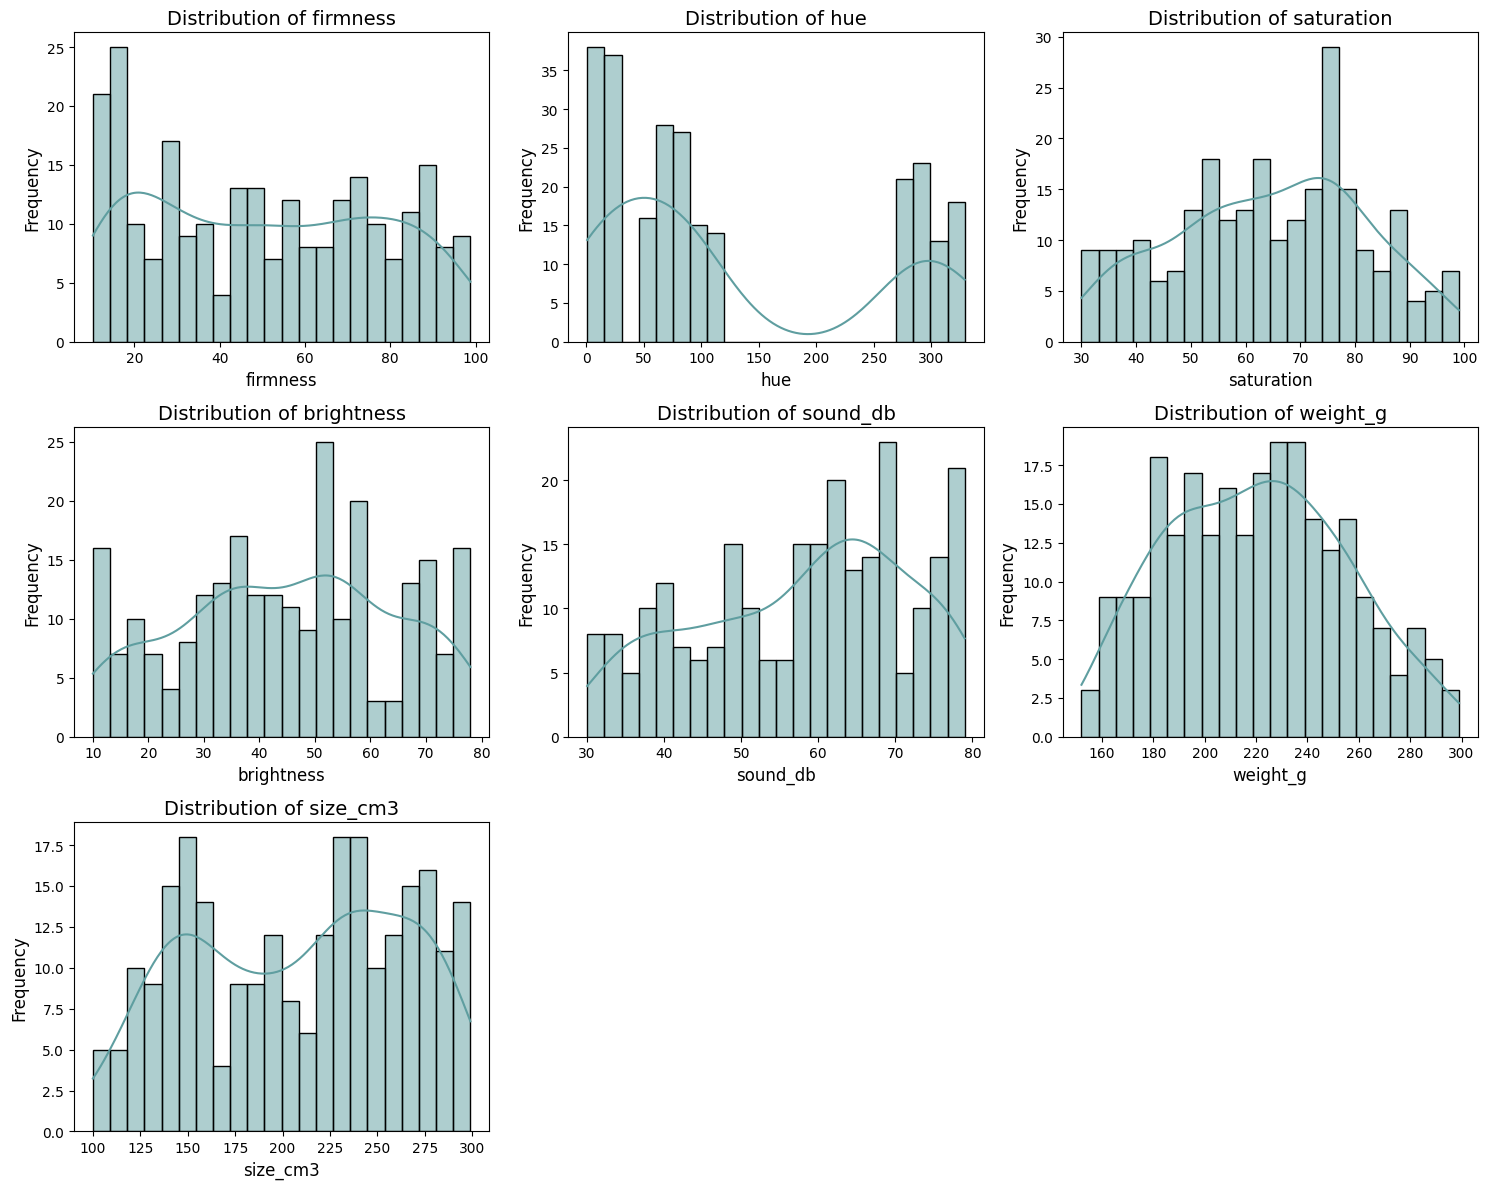

In [15]:
# Histograms for numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    if i < len(axes):  # Ensure we don't exceed the number of axes
        sns.histplot(df[col], bins=22, kde=True, color="cadetblue", edgecolor="black", ax=axes[i])
        axes[i].set_xlabel(col, fontsize=12)
        axes[i].set_ylabel("Frequency", fontsize=12)
        axes[i].set_title(f"Distribution of {col}", fontsize=14)

# Remove any unused axes
if len(axes) > len(numerical_cols):
    for j in range(len(numerical_cols), len(axes)):
        axes[j].remove()

plt.tight_layout()
plt.show()

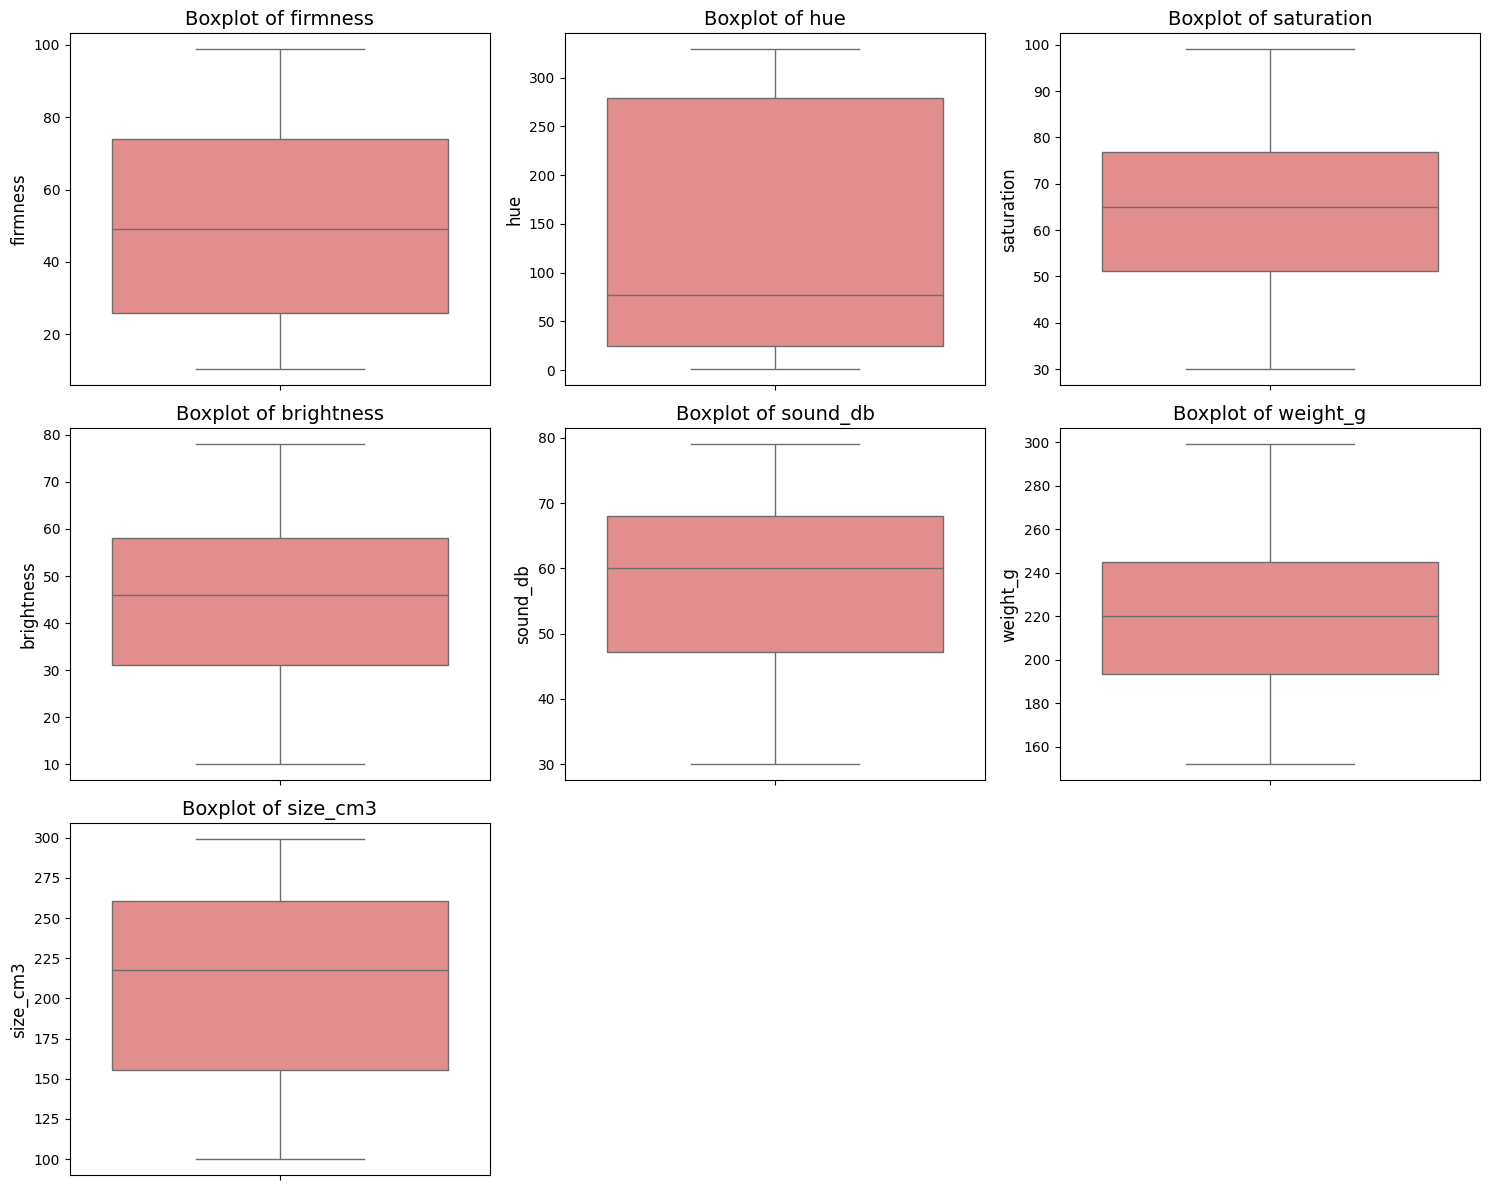

In [16]:
# Plotting each numerical column as a boxplot

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], color="lightcoral", ax=axes[i])
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

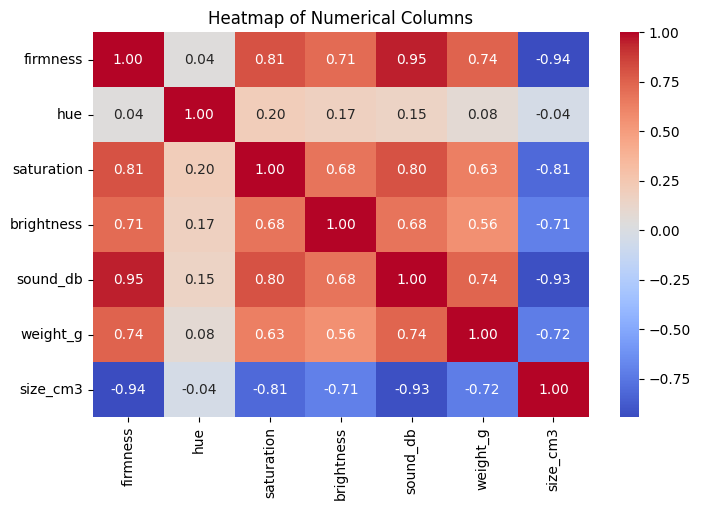

In [17]:
# Heatmap for numerical columns

numerical_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(8, 5))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Columns')
plt.show()

## Data Preprocessing

In [18]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':  
        df[col] = encoder.fit_transform(df[col].astype(str).values)

In [19]:
X = df.drop(columns=['ripeness'])
y = df['ripeness']

In [20]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

In [21]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [22]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [23]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[1.0, 0.86, 1.0, 1.0, 0.9, 1.0, 1.0, 1.0, 0.9]


## Model Evalaution

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        13

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

Confusion Matrix:
 [[13  0  0  0  0]
 [ 0  9  0  0  0]
 [ 0  0  8  0  0]
 [ 0  0  0  7  0]
 [ 0  0  0  0 13]]


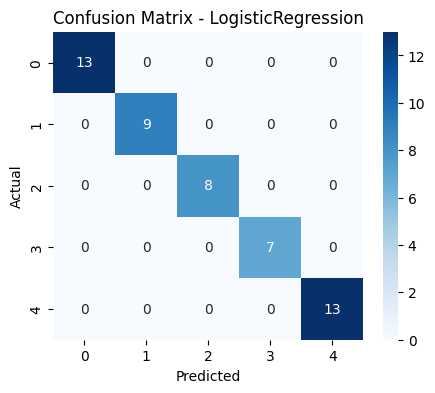

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.92      0.80        13
           1       0.75      0.33      0.46         9
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         7
           4       0.93      1.00      0.96        13

    accuracy                           0.86        50
   macro avg       0.88      0.85      0.84        50
weighted avg       0.86      0.86      0.84        50

Confusion Matrix:
 [[12  1  0  0  0]
 [ 5  3  0  0  1]
 [ 0  0  8  0  0]
 [ 0  0  0  7  0]
 [ 0  0  0  0 13]]


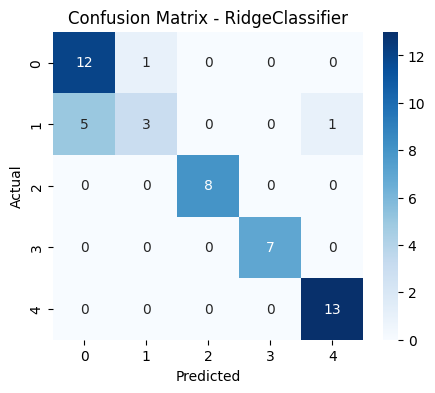

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        13

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

Confusion Matrix:
 [[13  0  0  0  0]
 [ 0  9  0  0  0]
 [ 0  0  8  0  0]
 [ 0  0  0  7  0]
 [ 0  0  0  0 13]]


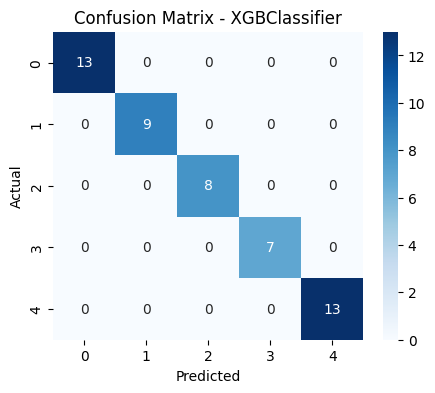

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        13

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

Confusion Matrix:
 [[13  0  0  0  0]
 [ 0  9  0  0  0]
 [ 0  0  8  0  0]
 [ 0  0  0  7  0]
 [ 0  0  0  0 13]]


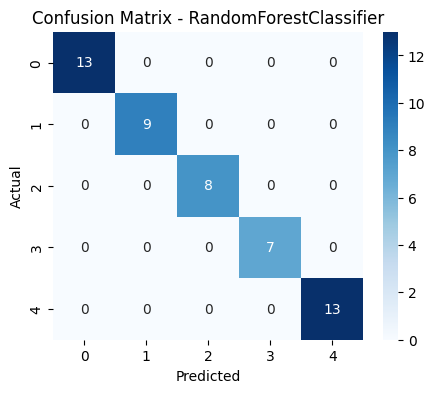

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.72      1.00      0.84        13
           1       1.00      0.44      0.62         9
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        13

    accuracy                           0.90        50
   macro avg       0.94      0.89      0.89        50
weighted avg       0.93      0.90      0.89        50

Confusion Matrix:
 [[13  0  0  0  0]
 [ 5  4  0  0  0]
 [ 0  0  8  0  0]
 [ 0  0  0  7  0]
 [ 0  0  0  0 13]]


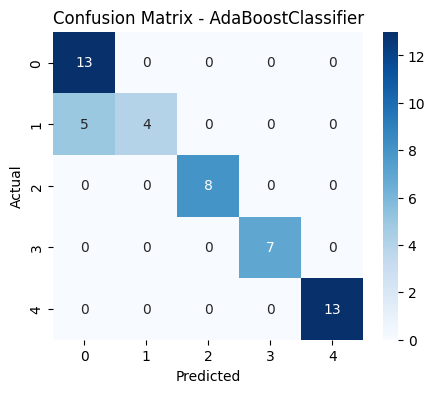

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        13

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

Confusion Matrix:
 [[13  0  0  0  0]
 [ 0  9  0  0  0]
 [ 0  0  8  0  0]
 [ 0  0  0  7  0]
 [ 0  0  0  0 13]]


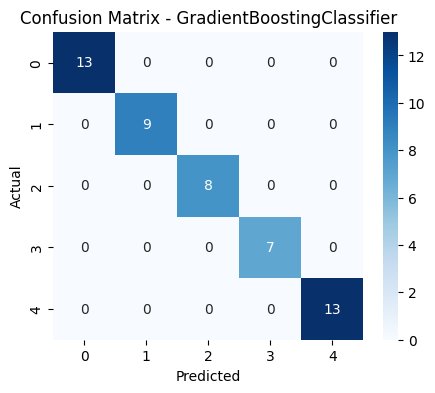

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        13

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

Confusion Matrix:
 [[13  0  0  0  0]
 [ 0  9  0  0  0]
 [ 0  0  8  0  0]
 [ 0  0  0  7  0]
 [ 0  0  0  0 13]]


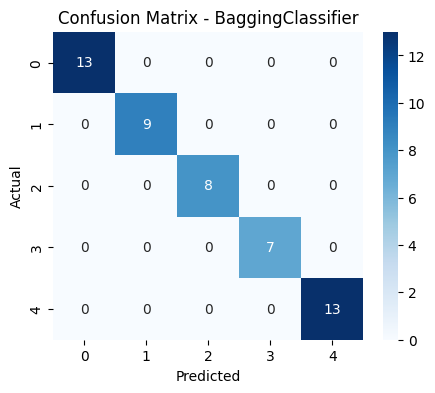

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        13

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

Confusion Matrix:
 [[13  0  0  0  0]
 [ 0  9  0  0  0]
 [ 0  0  8  0  0]
 [ 0  0  0  7  0]
 [ 0  0  0  0 13]]


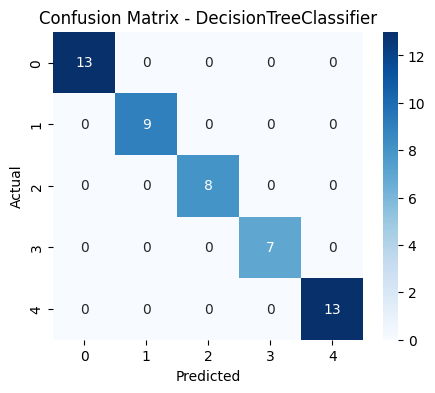

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       1.00      0.44      0.62         9
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         7
           4       0.81      1.00      0.90        13

    accuracy                           0.90        50
   macro avg       0.94      0.89      0.89        50
weighted avg       0.92      0.90      0.89        50

Confusion Matrix:
 [[13  0  0  0  0]
 [ 2  4  0  0  3]
 [ 0  0  8  0  0]
 [ 0  0  0  7  0]
 [ 0  0  0  0 13]]


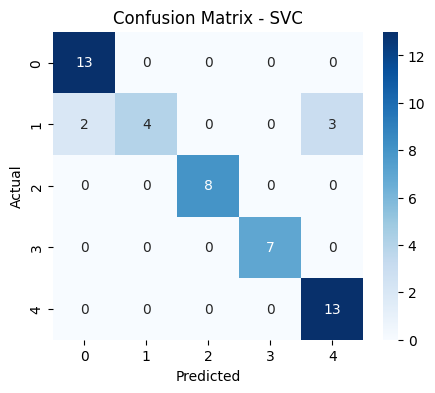

In [24]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()